In [42]:
import cv2
import matplotlib.pyplot as plt

In [43]:
cap = cv2.imread("Ferramentas-de-pedreiro-capa.jpg", cv2.COLOR_BGR2RGB)
cap_rgb = cv2.cvtColor(cap, cv2.COLOR_BGR2RGB)

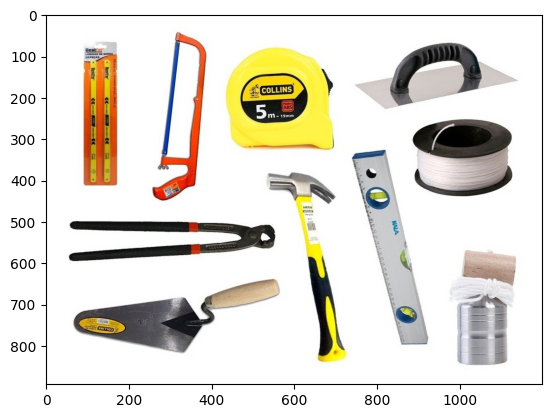

In [44]:
plt.imshow(cap_rgb)
plt.show()

In [45]:
blurred = cv2.GaussianBlur(cap_rgb, (5, 5), 0)

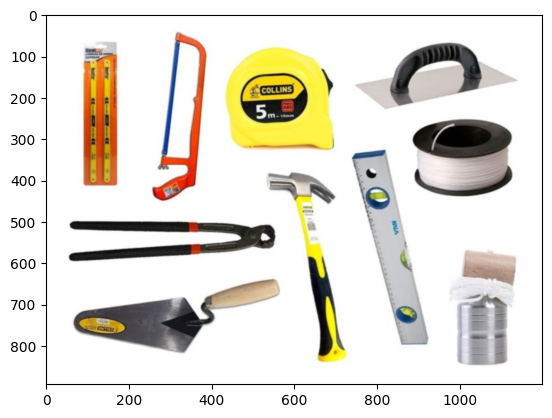

In [46]:
plt.imshow(blurred)
plt.show()

In [47]:
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

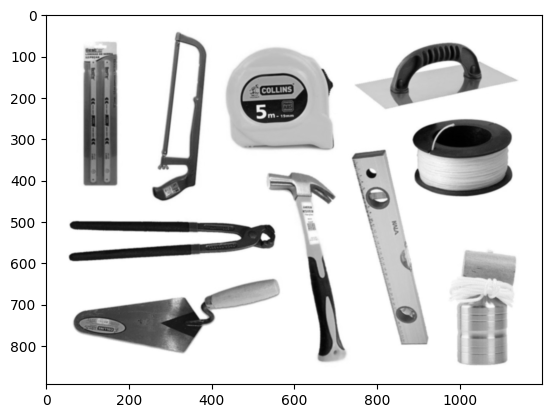

In [48]:
plt.imshow(gray, cmap=plt.cm.gray)
plt.show()

In [49]:
_, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)

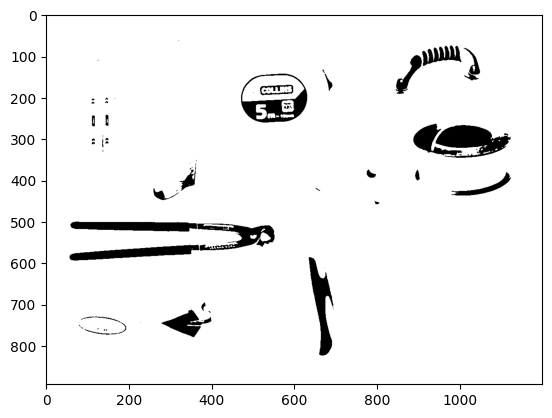

In [50]:
plt.imshow(thresh, cmap=plt.cm.gray)
plt.show()

In [51]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

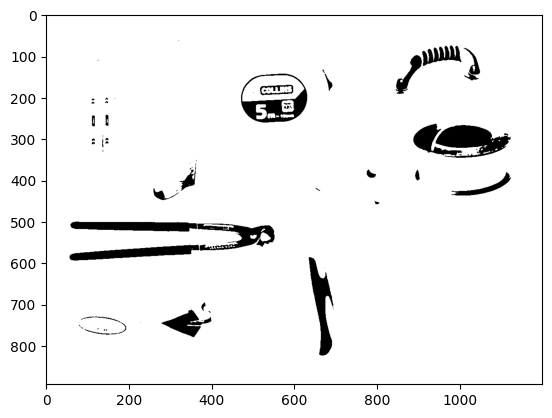

In [52]:
plt.imshow(thresh, cmap=plt.cm.gray)
plt.show()

In [53]:
contours, _ = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

TypeError: Invalid shape (1, 4, 1, 2) for image data

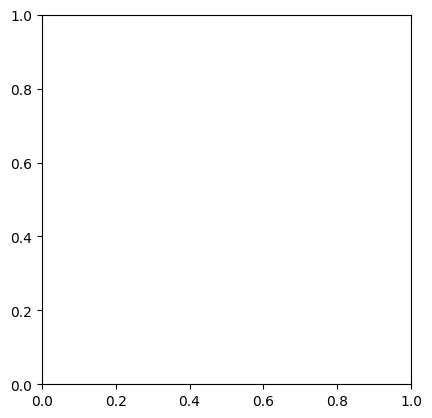

In [54]:
plt.imshow(contours, cmap=plt.cm.gray)
plt.show()

In [55]:
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 1000 and area < 5000:
        # Peça presente na linha de produção
        cv2.drawContours(cap, [contour], 0, (0, 255, 0), 2)
    else:
        # Peça ausente na linha de produção
        cv2.drawContours(cap, [contour], 0, (0, 0, 255), 2)

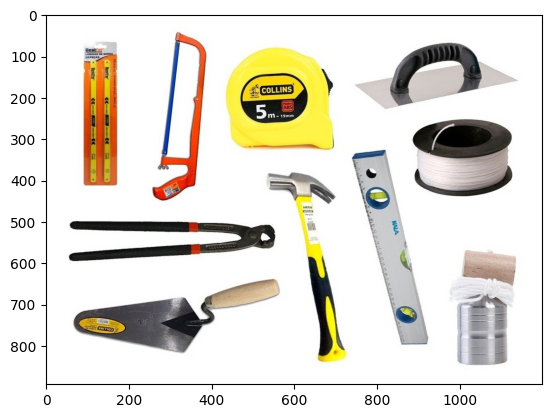

In [57]:
plt.imshow(cap_rgb)

plt.show()